<a href="https://colab.research.google.com/github/ramonaferrarii/MachineLearning2/blob/main/Code0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Upload the dataset
from google.colab import drive
drive.mount('/content/drive')

folder = 'drive/MyDrive/ML2_FinalProject/'

import pandas as pd
import numpy as np

data = pd.read_excel(folder + 'dataset.xlsx')

Mounted at /content/drive


In [20]:
# division of data: X vector and Y target

X = data.iloc[:,1:11].values
Y = data.iloc[:,0].values

# Debugging prints
print('Shape of X: ' + str(X.shape))
print('Shape of Y: ' + str(Y.shape))
print('MIN Vales of Y: ' + str(min(Y)))
print('MAX Vales of Y: ' + str(max(Y)))

Shape of X: (500000, 10)
Shape of Y: (500000,)
MIN Vales of Y: 0
MAX Vales of Y: 4


In [21]:
# normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [22]:
from random import sample

# remove the order
n  = 100000
nt = 500000-n
mask = np.asarray(sample(range(0,X.shape[0]),n+nt))
X = X[mask,:]
Y = Y[mask]

# division in learning and test
mask = range(0,n)
XL = X[mask,:]
YL = Y[mask]
mask = range(n,n+nt)
XT = X[mask,:]
YT = Y[mask]

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': [1,2,4,8,16,32]}
M = GridSearchCV(estimator  = KNeighborsClassifier(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'accuracy')
M.fit(np.asarray(XL),np.asarray(YL))
Yp = M.predict(XT)
cm = confusion_matrix(YT, Yp)
print('%Err: ' + str(100*np.mean(YT != Yp)))
print(cm)

%Err: 11.79325
[[79908     0     0     0     0]
 [   13 43742     0 36175     0]
 [    8   269 79291    99   440]
 [    0 10158     0 69950     0]
 [    0     0    11     0 79936]]


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plt_confmatrix(ytest,ypred):
  conf_matrix=confusion_matrix(YT, Yp)
  disp =  ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=M.classes_)
  disp.plot(cmap='Purples')
  plt.show()

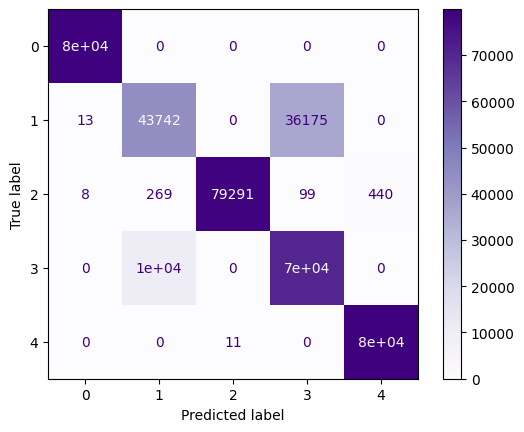

In [24]:
plt_confmatrix(YT,Yp)